# RVC 1, Ch2.2
https://petercorke.github.io/spatialmath-python/func_3d.html

In [1]:
# Works best with jupyter-notebook

In [1]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np

from spatialmath import *
from spatialmath.base import *
from roboticstoolbox import *
import matplotlib.pyplot as plt

## Lec 3.6 Describing 3D Translation and Rotation

In robotics we frequently need to describe the position of objects such as robots, cameras and workpieces. 

We represent position with an SE3 object,   For example to create a translation of 1 unit in the x-direction is simply

In [2]:
T1 = SE3.Tx(1)
print(T1)

   1           0           0           1            
   0           1           0           0            
   0           0           1           0            
   0           0           0           1            



More correctly this is a _motion_ in 3D space which we can visualize as the blue coordinate frame

<IPython.core.display.Javascript object>


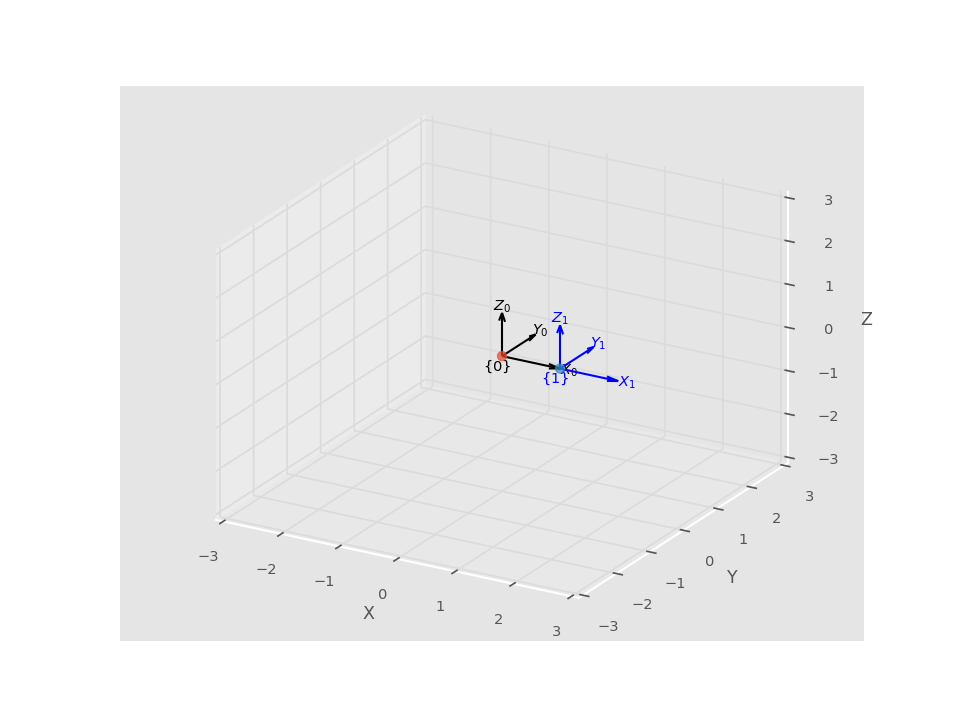

In [3]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[-3,3], color='black');
T1.plot(frame='1');

Click on the coordinate frame and use the mouse to change the viewpoint and verify that this is indeed a motion of 1 unit in the X-direction.

To consider this as a motion, as opposed to a position, think about picking up the world coordinate frame (black) which sits at the origin of this coordinate system, and carry it 1 unit in the x-direction.

Importantly we can _compose_ motions, that is perform the motions in sequence, and we denote this in python using the multiplication operator `*`. For example

In [4]:
T2 = T1 * T1

The choice of operator is arbitrary but it is a fairly common convention.  If python allowed a special operator like $\oplus$, such as used in the _Robotics, Vision & Control_ book, we could use that.  

The resulting motion, the _composition_ , is shown in blue.  It is 1 unit in the X-direction and then 1 unit in the X-direction, for a total of 2 units in the X-direction.

<IPython.core.display.Javascript object>


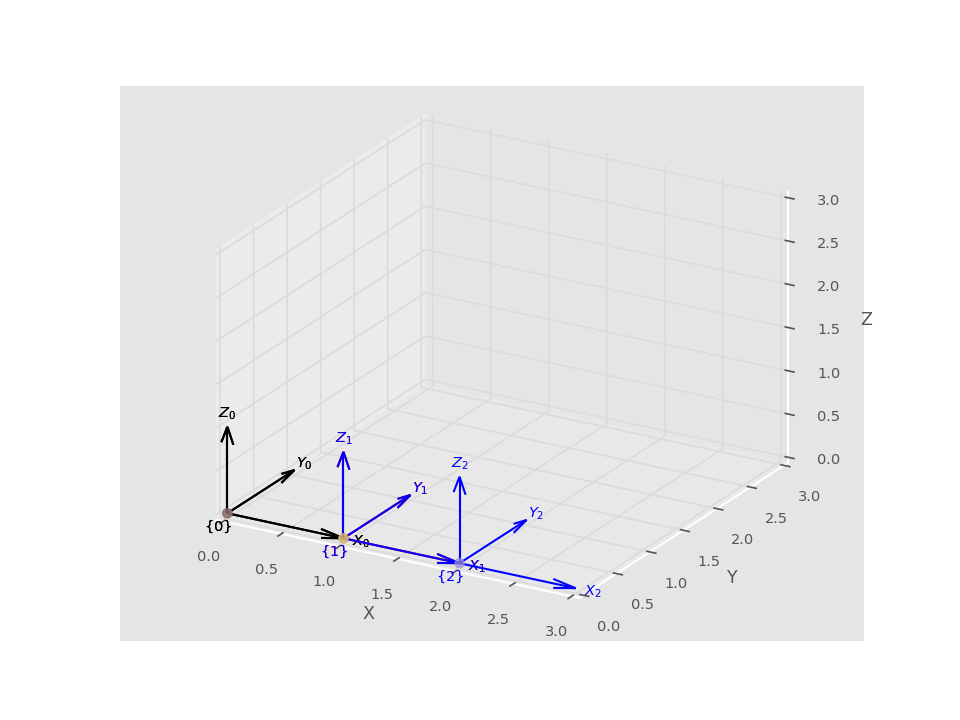

In [6]:
plt.figure() # create a new figure
SE3().plot(frame='0', dims=[-3,3], color='black');

T1.plot(frame='1', color='red');
T2.plot(frame='2');

We could also have written

In [18]:
T2 = T1**2

T2 = T1
T2 *= T1

Let's look at what's inside the SE3 object

In [19]:
T2

SE3:   1           0           0           2            
       0           1           0           0            
       0           0           1           0            
       0           0           0           1            
    

and perhaps surprisingly we see that it's a 4x4 matrix.  We could create a motion of 4 units in the Z-direction

In [20]:
SE3.Tz(4)

SE3:   1           0           0           0            
       0           1           0           0            
       0           0           1           4            
       0           0           0           1            
    

We observe some clear pattern and structure which is **accentuated here by the colors**.  

Translations: blue

Rotations:    red

Last row:     gray 

---

A mathematician would say these matrices are a subset of all possible real 4x4 matrices which belong to the Special Euclidean _group_ in 3 dimensions which is generally shortened to $\mbox{SE}(3)$ – hence the name of our Python class.  These matrices represent motions – often referred to as _rigid body motions_ in 3D space.  These matrices are also known as _homogeneous transformation_ matrices – a 4x4 matrix. One characteristic of these matrices is that multiplying them together causes the motions to be added.

This certainly seems like overkill for this problem – there are 16 numbers in each of these matrices and we know that only 3 are required to describe a position in 3D space.  It is also quite unintuitive since we multiplied matrices (complex) when we could have just _added_ these displacements using vectors.  Happily this has real advantages when we consider rotations in the next section so suspend your scepticism for now.

We finish off this section on position by noting that, following the earlier pattern, you can create a motion in the Z-direction by

In [21]:
SE3.Ty(3)

SE3:   1           0           0           0            
       0           1           0           3            
       0           0           1           0            
       0           0           0           1            
    

or we can specify motion in the X-, Y- and Z-directions in one hit. For example

In [22]:
SE3(7, 8, 9)

SE3:   1           0           0           7            
       0           1           0           8            
       0           0           1           9            
       0           0           0           1            
    

which is exactly the same as

In [23]:
SE3.Tx(7) * SE3.Ty(8) * SE3.Tz(9)

SE3:   1           0           0           7            
       0           1           0           8            
       0           0           1           9            
       0           0           0           1            
    

Those following closely might have noticed `SE3()` with no arguments which was used to position the black (world coordinate) frame.  This is simply the null motion.

Every motion has an "opposite motion" which is given by the inverse method

In [24]:
SE3.Ty(2).inv()

SE3:   1           0           0           0            
       0           1           0          -2            
       0           0           1           0            
       0           0           0           1            
    

So doing a motion, then the inverse motion 

In [25]:
SE3.Ty(2) * SE3.Ty(2).inv()

SE3:   1           0           0           0            
       0           1           0           0            
       0           0           1           0            
       0           0           0           1            
    

is a **null motion**.  Two steps forward, then two steps back.

### Point Transformations

Earlier we visualized an `SE3` object as a coordinate frame, not as a point.  Coordinate frames are extremely useful when thinking about problems in robotics – we typically attach them to a **robot's end-effector, a camera or a drone**.  They indicate not just where something is, but how it is oriented. The extra information that allows us to visualize an `SE3` object as a frame, not as a point, comes from all that extra information encoded in the SE(3) matrix.

Here we will considere not a change of coordiantes, but a transformation of the point itself:

- Consider a frame 'W' attached to the wrist of a robot.
- Then consider a point 'p' at the tip of the hand in world coordinates [1,1,0]. 
- If, the wrist rotates about the z-axis by 90 degrees wrt world by T, what are the new coordinates of the point?

In [16]:
p = [1,1,0]

which we have done with a Python list but we could also use a tuple or a numpy array. If the robot is at position of (4,5,6) then the point is _transformed_ to

In [17]:
T=SE3.Rz(90,"deg")

pp = T*p
print('The new coordinates of the point p are: ', pp)

The new coordinates of the point p are:  [-1.  1.  0.]


### Rotations and Translations can be easily combined:

We have discussed how `SE3` objects can represent position and how `SO3` objects can represent rotation.  You might recall that the SE3 matrix had a 3x3 component (colored red) to it and as you can probably guess that is actually an SO(3) matrix as we've just discussed. The SE(3) group is a superset if you like, of the SO(3) group.  The latter can represent orientation, whereas the SE(3) is also able to represent position. The combination of position and orientation is known as _pose_.

In [28]:
T1 = SE3(1, 2, 3) * SE3.Rx(30, 'deg')

Is a composition of two motions: a translation and _then_ a rotation.  We can see the rotation matrix, computed above, in the top-left corner and the translation components in the right-most column.  In the earlier example Out[20] was simply a null-rotation which is represented by the identity matrix.

The frame now looks like this

In [15]:
plt.figure

SE3().plot(frame='0', dims=[0,3], color='black')
T1.plot(frame='1')

The order of rotation is really important. If we reverse the two motions

In [30]:
T2 = SE3.Rx(30, 'deg') * SE3(1, 2, 3)

we see the result is different.  In this case we turned first, then moved so we followed a different path

In [31]:
T2.plot(frame='2', color='red')

Consider again a point which is attached to, or defined relative to the coordinate frame {1}.

In [32]:
P = [1, 2, 1]

In the world coordinate frame its coordinate is

In [33]:
T1 * P

array([       2,    3.232,    4.866])

where the position vector representing the point, has been premultiplied by the homogeneous transformation `T`. The point has been rotated and translated.

The vector is given here as a list but could also be a numpy array.  If the frame is denoted by {A} then our rotation matrix is ${}^0 \mathbf{T}_A$ so a point ${}^A P$ defined with respect to frame {A} is transformed as ${}^0 P = {}^0 \mathbf{T}_A\,{}^A P$.  


Now lets imagine the point P is defined with respect to the world coordinate frame.  To find its position with respect to frame {1} is simply

In [34]:
T1.inv() * P

array([       0,       -1,   -1.732])

where the inverse (computed in an efficient manner based on the structure of the matrix)

An SE3 instance has a number of properties, many of which are _inherited_ from the SO3 class.  For example the columns of the rotation are often written as $[n, o, a]$

In [35]:
T1.n, T1.o, T1.a

(array([       1,        0,        0]),
 array([       0,    0.866,      0.5]),
 array([       0,     -0.5,    0.866]))

We can extract the rotation matrix as a numpy array

In [36]:
T1.R

array([[       1,        0,        0],
       [       0,    0.866,     -0.5],
       [       0,      0.5,    0.866]])

or the translation vector, as a numpy array

In [37]:
T1.t

array([       1,        2,        3])

which has 3 elements because it is a translation in 3D space.

### Transforming points

Imagine now a set of points defining the vertices of a cube

In [38]:
P = np.array([[-1, 1, 1, -1, -1, 1, 1, -1], [-1, -1, 1, 1, -1, -1, 1, 1], [-1, -1, -1, -1, 1, 1, 1, 1]])
P

array([[-1,  1,  1, -1, -1,  1,  1, -1],
       [-1, -1,  1,  1, -1, -1,  1,  1],
       [-1, -1, -1, -1,  1,  1,  1,  1]])

defined with respect to a rotationg reference frame ${}^A P_i$.  Given a rotation ${}^0 \mathbf{T}_A$ as above, we determine the coordinates of the points in the world frame by ${}^0 P_i = ({}^0 \mathbf{T}_A)^{-1} {}^0 P_i$ which we can do in a single operation

In [39]:
T1 = SE3.Rx(90, 'deg')
Q = T1 * P
print(Q)

[[      -1        1        1       -1       -1        1        1       -1]
 [       1        1        1        1       -1       -1       -1       -1]
 [      -1       -1        1        1       -1       -1        1        1]]


which we could then plot.

<IPython.core.display.Javascript object>


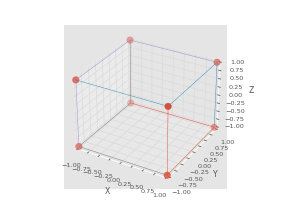

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Notice, there are a total of 8 vertices
# Each column is 1 vertex
# Below, we will pass them as rows: row1==x, row2==y, row3==z
ax.scatter(xs=Q[0], ys=Q[1], zs=Q[2], s=50)  # draw vertices

In [83]:
# draw lines joining the vertices
# Each number below represents one of the 8 coordinate points defined above
lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]] 

# Set limits and labels to the figure
ax.set_xlim3d(-1,1); ax.set_ylim3d(-1,1); ax.set_zlim3d(-1,1);
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z');

# Connect and print points to lines for x, y, z coordinates
from IPython import display
import time

for line in lines:
    ax.plot([Q[0,i] for i in line], [Q[1,i] for i in line], [Q[2,i] for i in line]) 
    fig.canvas.draw() # update figure
    time.sleep(1)     # wait a sec
        

## Multi-valued objects

For many tasks we might want to have a set or sequence of rotations or poses. The obvious solution would be to use a Python list

In [ ]:
T = [ SE3.Rx(0), SE3.Rx(0.1), SE3.Rx(0.2), SE3.Rx(0.3), SE3.Rx(0.4)]

but the pose objects in this package can hold multiple values, just like a native Python list can.  There are a few ways to do this, most obviously

In [ ]:
T = SE3( [ SE3.Rx(0), SE3.Rx(0.1), SE3.Rx(0.2), SE3.Rx(0.3), SE3.Rx(0.4)] )

which has the type of a pose object

In [ ]:
type(T)

but it has length of five

In [ ]:
len(T)

that is, it contains five values.  We can see these when we display the object's value

In [ ]:
T

We can index into the object (slice it) just as we would a Python list

In [ ]:
T[3]

or from the second element to the last in steps of two

In [ ]:
T[1:-1:2]

We could another value to the end

In [ ]:
T.append( SE3.Rx(0.5) )
len(T)

and we we see that the length has increased.  The value just appended would be `T[5]`

The `SE3` class, like all the classes in the spatialmath package, inherits from the `UserList` class giving it all the methods of a Python list like `append`, `extend`, `insert`, `pop`, `del`, `clear`, `reverse`.

We could write the above example more succinctly as

In [ ]:
T = SE3.Rx( np.linspace(0, 0.5, 5) )
len(T)

Consider another rotation

In [ ]:
T2 = SE3.Ry(40, 'deg')

then we can write

In [ ]:
A = T * T2
len(A)

which has produced a new list where each element of `A` is the `T[i] * T2`.  Similarly

In [ ]:
B = T2 * T
len(B)

which has produced a new list where each element of `B` is the `T2 * T[i]`.

And perhaps not surprisingly 

In [ ]:
C = T * T
len(C)

which has produced a new list where each element of `C` is the product `T[i] * T[i]`.

We can apply such a sequence to a coordinate vectors as we did earlier

In [ ]:
P = T * [0, 1, 0]
P

where each element of `T` has transformed the 3D coordinate vector $(0, 1, 0)$, the results being consecutive columns of the resulting numpy array.  Note that:
 * the vector  has been implicitly considered as a column vector, 
 * the vector can be given as a list (as in this case) or as a NumPy array

Imagine now that we wanted to display the cube we showed earlier, for each value in the pose object, we simply use a `for` loop

In [ ]:
for x in T:
    Q = x * P
    # plot(Q)

and we can also use these pose objects inside list comprehensions

In [ ]:
np.array([ x * [0,1,0] for x in T])